In [1]:
# Homework 6 Template
# G. Besla & R. Li

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass



In [5]:
def OrbitCOM(galaxy,start,end,n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
          galaxy - name of galaxy (MW,M31,M33)
          start - first snapshot to be read in
          end - last snapshot to be read in
          n - an integer indicating the intervals over which COM will be returned
    returns: 
          file containing COM position and velocity vectors as a function of time
    """
    
    # compose the filename for output
    fileout = 'Orbit_' + "%s"%(galaxy) + '.txt' 
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    delta = 0.1
    if (galaxy != 'M33'):
        VolDec = 2
    # for M33 that is stripped more, use different values for VolDec
    else: 
        VolDec = 4
    
    # generate the snapshot id sequence 
    snap_ids = np.arange(start,end+1,n) # end+1 ensures last member of array is actually snap number for end
    # it is always a good idea to also check if the input is eligible (not required)
    if (len(snap_ids)==0):
        print("Start and end inputs are not valid")
        return
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([len(snap_ids),7])
    
    # a for loop 
    for  i,snap_id in enumerate(snap_ids): # loop over files
        
        # compose the data filename (be careful about the folder)
        ilbl = '000' + str(snap_id) # add a string of snap_id to value "000"
        ilbl = ilbl[-3:] # remove all but last 3 digits
        filename = "%s_"%(galaxy) + ilbl + '.txt' # create filename
        
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename,2)
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COMP = COM.COM_P(delta,VolDec)
        COMV = COM.COM_V(COMP[0],COMP[1],COMP[2])
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        orbit[i] = (COM.time).value/1000, *tuple(COMP.value), *tuple(COMV.value)
        
        # print snap_id to see the progress
        print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [14]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 

OrbitCOM('MW',0,800,5)


0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800


In [11]:
OrbitCOM('M31',0,800,5)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800


In [15]:
OrbitCOM('M33',0,800,5)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800


In [16]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt

MWdata = np.genfromtxt('Orbit_MW.txt',dtype=None,names=True)
M31data = np.genfromtxt('Orbit_M31.txt',dtype=None,names=True)
M33data = np.genfromtxt('Orbit_M33.txt',dtype=None,names=True)

In [17]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  

def magdiff(ax,ay,az,bx,by,bz):
    return np.sqrt((ax-bx)**2+(ay-by)**2+(az-bz)**2)

In [25]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
MWx = MWdata['x']
MWy = MWdata['y']
MWz = MWdata['z']

MWvx = MWdata['vx']
MWvy = MWdata['vy']
MWvz = MWdata['vz']

M31x = M31data['x']
M31y = M31data['y']
M31z = M31data['z']

M31vx = M31data['vx']
M31vy = M31data['vy']
M31vz = M31data['vz']

M33x = M33data['x']
M33y = M33data['y']
M33z = M33data['z']

M33vx = M33data['vx']
M33vy = M33data['vy']
M33vz = M33data['vz']

MWM31relpos = magdiff(MWx,MWy,MWz,M31x,M31y,M31z)
MWM31relvel = magdiff(MWvx,MWvy,MWvz,M31vx,M31vy,M31vz)

# of M33 and M31

M31M33relpos = magdiff(M31x,M31y,M31z,M33x,M33y,M33z)
M31M33relvel = magdiff(M31vx,M31vy,M31vz,M33vx,M33vy,M33vz)


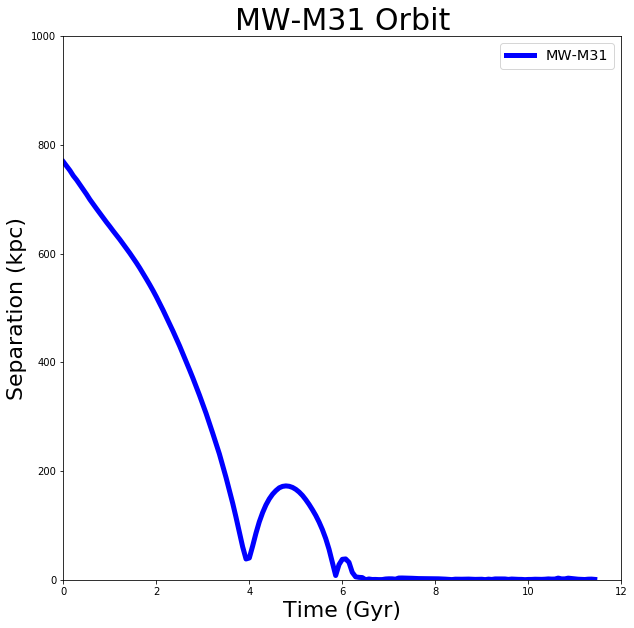

In [27]:
# Plot the Orbit of MW - M31
#################################
 
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot relative position between MW and M31
plt.plot(MWdata['t'],MWM31relpos,color='blue',linewidth=5,label='MW-M31')

# Add chart title 
plt.title('MW-M31 Orbit',fontsize=30)

# Add axis labels
plt.xlabel('Time (Gyr)',fontsize=22)
plt.ylabel('Separation (kpc)',fontsize=22)

# set axis limits
plt.xlim(0,12)
plt.ylim(0,1000)


# add a legend
legend = ax.legend(loc='upper right',fontsize='x-large')

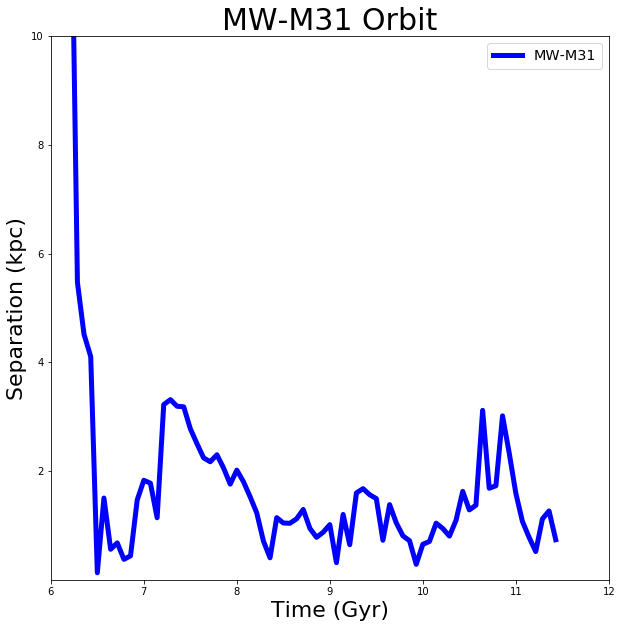

In [36]:
# Plot the zoomed-in Orbit of MW - M31 in log scale
#################################
 
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot relative position between MW and M31 in log scale
plt.plot(MWdata['t'],MWM31relpos,color='blue',linewidth=5,label='MW-M31')

# Add chart title 
plt.title('MW-M31 Orbit',fontsize=30)

# Add axis labels
plt.xlabel('Time (Gyr)',fontsize=22)
plt.ylabel('Separation (kpc)',fontsize=22)

# set axis limits
plt.xlim(6,12)
plt.ylim(1e-3,10)


# add a legend
legend = ax.legend(loc='upper right',fontsize='x-large')

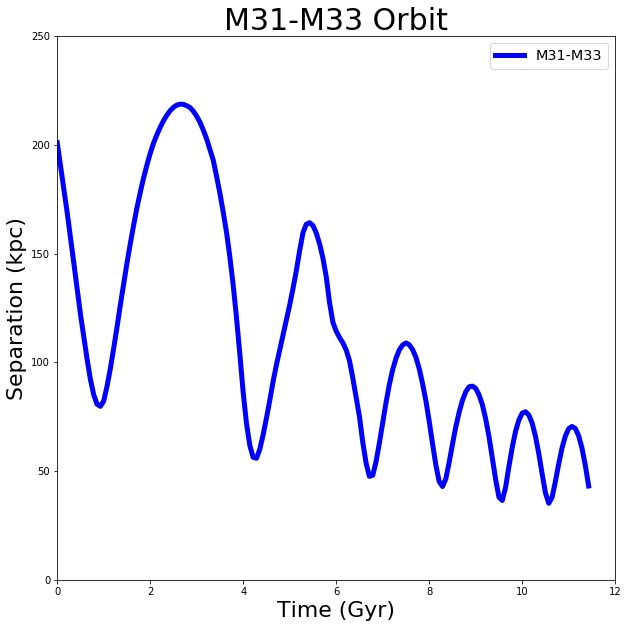

In [28]:
# Plot the Orbit of M31 - M33
#################################
 
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot relative position between M31 and M33
plt.plot(M31data['t'],M31M33relpos,color='blue',linewidth=5,label='M31-M33')

# Add chart title 
plt.title('M31-M33 Orbit',fontsize=30)

# Add axis labels
plt.xlabel('Time (Gyr)',fontsize=22)
plt.ylabel('Separation (kpc)',fontsize=22)

# set axis limits
plt.xlim(0,12)
plt.ylim(0,250)


# add a legend
legend = ax.legend(loc='upper right',fontsize='x-large')

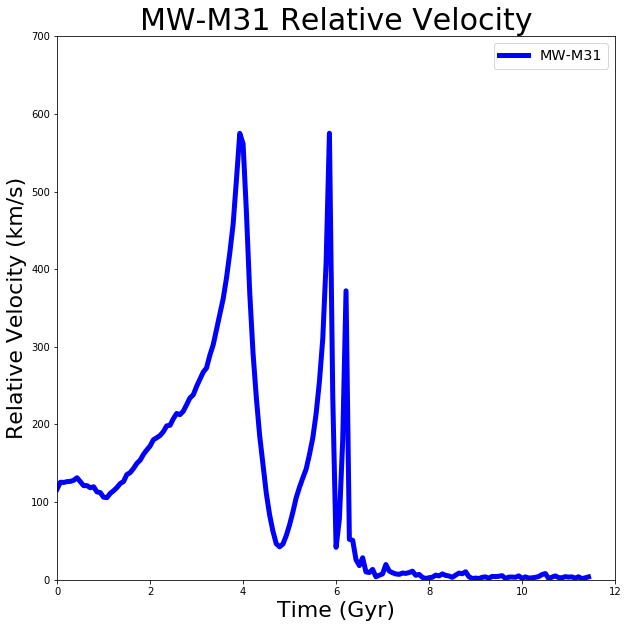

In [30]:
# Plot the orbital velocity of MW - M31 
#################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot relative position between MW and M31
plt.plot(MWdata['t'],MWM31relvel,color='blue',linewidth=5,label='MW-M31')

# Add chart title 
plt.title('MW-M31 Relative Velocity',fontsize=30)

# Add axis labels
plt.xlabel('Time (Gyr)',fontsize=22)
plt.ylabel('Relative Velocity (km/s)',fontsize=22)

# set axis limits
plt.xlim(0,12)
plt.ylim(0,700)


# add a legend
legend = ax.legend(loc='upper right',fontsize='x-large')

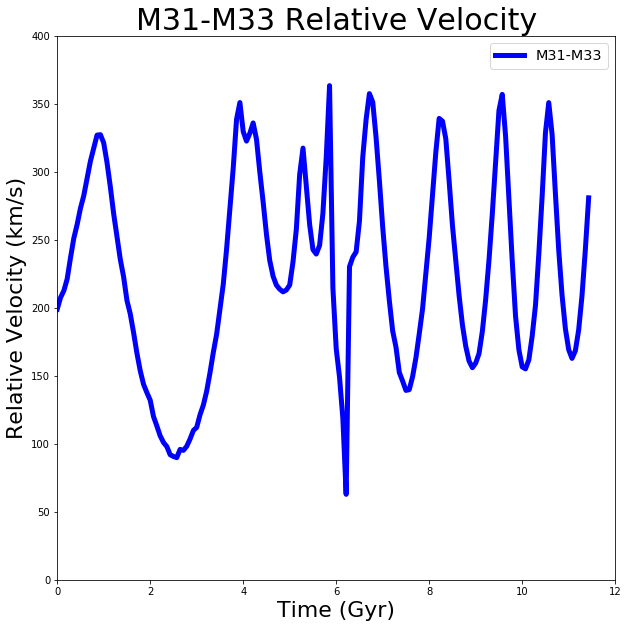

In [32]:
# Plot the orbital velocity of M31 - M33 
#################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot relative position between MW and M31
plt.plot(MWdata['t'],M31M33relvel,color='blue',linewidth=5,label='M31-M33')

# Add chart title 
plt.title('M31-M33 Relative Velocity',fontsize=30)

# Add axis labels
plt.xlabel('Time (Gyr)',fontsize=22)
plt.ylabel('Relative Velocity (km/s)',fontsize=22)

# set axis limits
plt.xlim(0,12)
plt.ylim(0,400)


# add a legend
legend = ax.legend(loc='upper right',fontsize='x-large')


In [37]:
# 1. MW and M31 will experience 2 close encounters before merger

In [38]:
# 2. Min (resp, max) in separation roughly corresponds to max (resp, min) in relative velocity. 

In [39]:
# 3. MW and M31 merge at roughly 6.5 Gyr. M33's orbit immediately becomes much smaller, and then continues to decrease
# at a roughly constant rate. 

In [41]:
# 4. Approximately 21 kpc/Gyr decay rate. It will then take roughly 75/21 ~ 3.6 Gyr to merge with MW+M31 remnant.